# A Look at Provider Medicare Payments for 2016

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [2]:
prov_pmnt_2016 = pd.read_csv('../data/Medicare_Provider_Utilization_Payment _2016.txt', sep='\t', header=0)

C:\Users\brand\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
prov_pmnt_2016.columns = prov_pmnt_2016.columns.str.strip().str.lower()

# What is the Payment Data for a Specific Service (xxxxx),
# Entity Type (Individual) and Place of Service (Office)?

In [4]:
#creating the df for the selected columns
prov_pmnt_2016 = prov_pmnt_2016[['npi', 'nppes_provider_last_org_name', 'nppes_entity_code', 'provider_type', 'place_of_service', 'hcpcs_code',
    'hcpcs_description', 'line_srvc_cnt', 'bene_day_srvc_cnt', 'average_medicare_allowed_amt', 'average_medicare_payment_amt']]
prov_pmnt_2016.head()

,npi,nppes_provider_last_org_name,nppes_entity_code,provider_type,place_of_service,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_medicare_payment_amt
0,1,CPT copyright 2015 American Medical Associatio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1003000126,ENKESHAFI,I,Internal Medicine,F,99217,Hospital observation care discharge,57.0,57.0,72.743158,54.474386
2,1003000126,ENKESHAFI,I,Internal Medicine,F,99219,Hospital observation care typically 50 minutes,38.0,38.0,135.010000,105.850000
3,1003000126,ENKESHAFI,I,Internal Medicine,F,99220,Hospital observation care typically 70 minutes...,23.0,23.0,189.239565,146.116522
4,1003000126,ENKESHAFI,I,Internal Medicine,F,99221,"Initial hospital inpatient care, typically 30 ...",20.0,20.0,100.750000,78.990000


In [5]:
prov_pmnt_2016.shape

(9714897, 11)

In [6]:
prov_pmnt_2016.hcpcs_code.value_counts().head()

99213    450297
99214    412858
99204    175923
99203    175192
99232    173161
Name: hcpcs_code, dtype: int64

**A Look At The Top 5 Procedure Codes**

In [7]:
#filtering the df for the nppes_entity_code, hcpcs_code & place_of_service I want.
#nppes_entity_code == I (Individual), hcpcs_code== 66984 (Removal of cataract with insertion of lens), place_of_service== O (Office)


#new_df = orig_df[(orig_df.column.isin(orig_df.column)) &
                                            #(orig_df.column.isin(["x,y,z"]))]
    #new_df = orig_df.reset_index(drop=True)
    
    
top_5_codes = prov_pmnt_2016[(
    prov_pmnt_2016.nppes_entity_code.isin(["I"]) &
    prov_pmnt_2016.hcpcs_code.isin(["99213", "99214", "99204", "99203", "99232"]) &
    prov_pmnt_2016.place_of_service.isin(["O"]))]

#resetting the index of the subset, so that the first row = 0
top_5_codes = top_5_codes.reset_index(drop=True)
top_5_codes.head()

,npi,nppes_provider_last_org_name,nppes_entity_code,provider_type,place_of_service,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_medicare_payment_amt
0,1003000142,KHALIL,I,Anesthesiology,O,99204,"New patient office or other outpatient visit, ...",91.0,91.0,160.23,113.604835
1,1003000142,KHALIL,I,Anesthesiology,O,99213,Established patient office or other outpatient...,65.0,65.0,70.42,52.139385
2,1003000142,KHALIL,I,Anesthesiology,O,99214,Established patient office or other outpatient...,262.0,262.0,103.93,71.795344
3,1003000423,VELOTTA,I,Obstetrics & Gynecology,O,99203,"New patient office or other outpatient visit, ...",16.0,16.0,102.40,75.262500
4,1003000423,VELOTTA,I,Obstetrics & Gynecology,O,99213,Established patient office or other outpatient...,27.0,27.0,69.01,50.101852


In [8]:
#checking how many rows were returned for the top 5 subset I specified

top_5_codes.shape

(1062361, 11)

In [9]:
#checking to make sure my new subset, Top_5_codes, is a dataframe and what the dtypes are

top_5_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062361 entries, 0 to 1062360
Data columns (total 11 columns):
npi                             1062361 non-null int64
nppes_provider_last_org_name    1062336 non-null object
nppes_entity_code               1062361 non-null object
provider_type                   1062361 non-null object
place_of_service                1062361 non-null object
hcpcs_code                      1062361 non-null object
hcpcs_description               1062361 non-null object
line_srvc_cnt                   1062361 non-null float64
bene_day_srvc_cnt               1062361 non-null float64
average_medicare_allowed_amt    1062361 non-null float64
average_medicare_payment_amt    1062361 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 89.2+ MB


**Make a new df for each Top 5 code for plotting purposes**

Top 5 = 99213", "99214", "99204", "99203", "99232

code == code description
new df names = code_hcpcscode?

code_xxxxx = top_5_codes[(
    top_5_codes.hcpcs_code.isin(["xxxxx"])

1. code_99213 == Established patient 
2. code_99214 == Established patient
3. code_99204 == New patient office
4. code_99203 == New patient office
5. code_99232 == Subsequent hospital inpatient

In [10]:
code_99213 = top_5_codes[(
    top_5_codes.hcpcs_code.isin(["99213"])
)]

#resetting the index of the subset, so that the first row = 0
code_99213 = code_99213.reset_index(drop=True)
code_99213.head()

,npi,nppes_provider_last_org_name,nppes_entity_code,provider_type,place_of_service,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_medicare_payment_amt
0,1003000142,KHALIL,I,Anesthesiology,O,99213,Established patient office or other outpatient...,65.0,65.0,70.420000,52.139385
1,1003000423,VELOTTA,I,Obstetrics & Gynecology,O,99213,Established patient office or other outpatient...,27.0,27.0,69.010000,50.101852
2,1003000522,WEIGAND,I,Family Practice,O,99213,Established patient office or other outpatient...,330.0,330.0,62.382091,44.247879
3,1003000530,SEMONCHE,I,Internal Medicine,O,99213,Established patient office or other outpatient...,131.0,131.0,77.940000,45.204351
4,1003000597,KIM,I,Urology,O,99213,Established patient office or other outpatient...,193.0,193.0,68.380000,49.381399


**Add a column for the avgs of each different Top 5 code**

avg_list = prov_util__pmt_2016.loc[: , "average_medicare_allowed_amt"]

prov_util__pmt_2016["medicare_allowed_avg"] = avg_list.mean(axis=0)

In [11]:
#caclulating the avg of the measure columns for each code and listing that avg in a new column

#list_name = df.loc[: , "first_measure_column":"second_measure_column"]
#df['new_column_name'] = list_name.mean(axis=0); axis 0 = calculates column wise and axis=1 calculates row wise
#df

code_99213_list = code_99213.loc[: , "average_medicare_allowed_amt"]

code_99213["code_medicare_allowed_avg"] = code_99213_list.mean(axis=0)


code_99213_list_2 = code_99213.loc[: , "average_medicare_payment_amt"]

code_99213["code_medicare_payment_avg"] = code_99213_list_2.mean(axis=0)
code_99213.head()

,npi,nppes_provider_last_org_name,nppes_entity_code,provider_type,place_of_service,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_medicare_payment_amt,code_medicare_allowed_avg,code_medicare_payment_avg
0,1003000142,KHALIL,I,Anesthesiology,O,99213,Established patient office or other outpatient...,65.0,65.0,70.420000,52.139385,69.411959,47.345559
1,1003000423,VELOTTA,I,Obstetrics & Gynecology,O,99213,Established patient office or other outpatient...,27.0,27.0,69.010000,50.101852,69.411959,47.345559
2,1003000522,WEIGAND,I,Family Practice,O,99213,Established patient office or other outpatient...,330.0,330.0,62.382091,44.247879,69.411959,47.345559
3,1003000530,SEMONCHE,I,Internal Medicine,O,99213,Established patient office or other outpatient...,131.0,131.0,77.940000,45.204351,69.411959,47.345559
4,1003000597,KIM,I,Urology,O,99213,Established patient office or other outpatient...,193.0,193.0,68.380000,49.381399,69.411959,47.345559


In [12]:
#rounding the measure columns to 2 decimal places

cols = ['average_medicare_allowed_amt', 'average_medicare_payment_amt','code_medicare_allowed_avg','code_medicare_payment_avg']

code_99213[cols] = code_99213[cols].round(2)

code_99213.head()

,npi,nppes_provider_last_org_name,nppes_entity_code,provider_type,place_of_service,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_medicare_payment_amt,code_medicare_allowed_avg,code_medicare_payment_avg
0,1003000142,KHALIL,I,Anesthesiology,O,99213,Established patient office or other outpatient...,65.0,65.0,70.42,52.14,69.41,47.35
1,1003000423,VELOTTA,I,Obstetrics & Gynecology,O,99213,Established patient office or other outpatient...,27.0,27.0,69.01,50.10,69.41,47.35
2,1003000522,WEIGAND,I,Family Practice,O,99213,Established patient office or other outpatient...,330.0,330.0,62.38,44.25,69.41,47.35
3,1003000530,SEMONCHE,I,Internal Medicine,O,99213,Established patient office or other outpatient...,131.0,131.0,77.94,45.20,69.41,47.35
4,1003000597,KIM,I,Urology,O,99213,Established patient office or other outpatient...,193.0,193.0,68.38,49.38,69.41,47.35


In [13]:
code_99214 = top_5_codes[(
    top_5_codes.hcpcs_code.isin(["99214"])
)]

#resetting the index of the subset, so that the first row = 0
code_99214 = code_99214.reset_index(drop=True)

In [14]:
code_99214_list = code_99214.loc[: , "average_medicare_allowed_amt"]

code_99214["code_medicare_allowed_avg"] = code_99214_list.mean(axis=0)


code_99214_list_2 = code_99214.loc[: , "average_medicare_payment_amt"]

code_99214["code_medicare_payment_avg"] = code_99214_list_2.mean(axis=0)

cols = ['average_medicare_allowed_amt', 'average_medicare_payment_amt','code_medicare_allowed_avg','code_medicare_payment_avg']

code_99214[cols] = code_99214[cols].round(2)

code_99214.head()

,npi,nppes_provider_last_org_name,nppes_entity_code,provider_type,place_of_service,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_medicare_payment_amt,code_medicare_allowed_avg,code_medicare_payment_avg
0,1003000142,KHALIL,I,Anesthesiology,O,99214,Established patient office or other outpatient...,262.0,262.0,103.93,71.80,102.5,70.51
1,1003000522,WEIGAND,I,Family Practice,O,99214,Established patient office or other outpatient...,612.0,612.0,93.44,63.80,102.5,70.51
2,1003000530,SEMONCHE,I,Internal Medicine,O,99214,Established patient office or other outpatient...,574.0,574.0,114.63,72.79,102.5,70.51
3,1003000597,KIM,I,Urology,O,99214,Established patient office or other outpatient...,108.0,108.0,101.07,76.06,102.5,70.51
4,1003000902,LOHANO,I,Family Practice,O,99214,Established patient office or other outpatient...,154.0,154.0,102.74,63.48,102.5,70.51


In [15]:
code_99204 = top_5_codes[(
    top_5_codes.hcpcs_code.isin(["99204"])
)]

#resetting the index of the subset, so that the first row = 0
code_99204 = code_99204.reset_index(drop=True)

In [16]:
code_99204_list = code_99204.loc[: , "average_medicare_allowed_amt"]

code_99204["code_medicare_allowed_avg"] = code_99204_list.mean(axis=0)


code_99204_list_2 = code_99204.loc[: , "average_medicare_payment_amt"]

code_99204["code_medicare_payment_avg"] = code_99204_list_2.mean(axis=0)

cols = ['average_medicare_allowed_amt', 'average_medicare_payment_amt','code_medicare_allowed_avg','code_medicare_payment_avg']

code_99204[cols] = code_99204[cols].round(2)

code_99204.head()

,npi,nppes_provider_last_org_name,nppes_entity_code,provider_type,place_of_service,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_medicare_payment_amt,code_medicare_allowed_avg,code_medicare_payment_avg
0,1003000142,KHALIL,I,Anesthesiology,O,99204,"New patient office or other outpatient visit, ...",91.0,91.0,160.23,113.60,161.74,112.54
1,1003000522,WEIGAND,I,Family Practice,O,99204,"New patient office or other outpatient visit, ...",16.0,16.0,142.84,60.69,161.74,112.54
2,1003000597,KIM,I,Urology,O,99204,"New patient office or other outpatient visit, ...",25.0,25.0,155.79,119.21,161.74,112.54
3,1003000936,STELLINGWORTH,I,Internal Medicine,O,99204,"New patient office or other outpatient visit, ...",62.0,62.0,157.62,114.34,161.74,112.54
4,1003001017,NICHOLS,I,Dermatology,O,99204,"New patient office or other outpatient visit, ...",73.0,73.0,176.56,124.14,161.74,112.54


In [17]:
code_99203 = top_5_codes[(
    top_5_codes.hcpcs_code.isin(["99203"])
)]

#resetting the index of the subset, so that the first row = 0
code_99203 = code_99203.reset_index(drop=True)

In [18]:
code_99203_list = code_99203.loc[: , "average_medicare_allowed_amt"]

code_99203["code_medicare_allowed_avg"] = code_99203_list.mean(axis=0)


code_99203_list_2 = code_99203.loc[: , "average_medicare_payment_amt"]

code_99203["code_medicare_payment_avg"] = code_99203_list_2.mean(axis=0)

cols = ['average_medicare_allowed_amt', 'average_medicare_payment_amt','code_medicare_allowed_avg','code_medicare_payment_avg']

code_99203[cols] = code_99203[cols].round(2)

code_99203.head()

,npi,nppes_provider_last_org_name,nppes_entity_code,provider_type,place_of_service,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_medicare_payment_amt,code_medicare_allowed_avg,code_medicare_payment_avg
0,1003000423,VELOTTA,I,Obstetrics & Gynecology,O,99203,"New patient office or other outpatient visit, ...",16.0,16.0,102.40,75.26,103.99,69.54
1,1003000597,KIM,I,Urology,O,99203,"New patient office or other outpatient visit, ...",97.0,97.0,101.28,67.41,103.99,69.54
2,1003000902,LOHANO,I,Family Practice,O,99203,"New patient office or other outpatient visit, ...",33.0,33.0,102.63,64.14,103.99,69.54
3,1003001017,NICHOLS,I,Dermatology,O,99203,"New patient office or other outpatient visit, ...",17.0,17.0,116.69,65.03,103.99,69.54
4,1003001363,STEVENS,I,Anesthesiology,O,99203,"New patient office or other outpatient visit, ...",95.0,95.0,111.69,79.26,103.99,69.54


In [19]:
code_99232 = top_5_codes[(
    top_5_codes.hcpcs_code.isin(["99232"])
)]

#resetting the index of the subset, so that the first row = 0
code_99232 = code_99232.reset_index(drop=True)

In [20]:
code_99232_list = code_99232.loc[: , "average_medicare_allowed_amt"]

code_99232["code_medicare_allowed_avg"] = code_99232_list.mean(axis=0)


code_99232_list_2 = code_99232.loc[: , "average_medicare_payment_amt"]

code_99232["code_medicare_payment_avg"] = code_99232_list_2.mean(axis=0)

cols = ['average_medicare_allowed_amt', 'average_medicare_payment_amt','code_medicare_allowed_avg','code_medicare_payment_avg']

code_99232[cols] = code_99232[cols].round(2)

code_99232.head()

,npi,nppes_provider_last_org_name,nppes_entity_code,provider_type,place_of_service,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_medicare_payment_amt,code_medicare_allowed_avg,code_medicare_payment_avg
0,1306938410,SINGHAL,I,Psychiatry,O,99232,"Subsequent hospital inpatient care, typically ...",12.0,12.0,69.12,54.19,65.71,51.2
1,1437130788,FERNANDEZ,I,Psychiatry,O,99232,"Subsequent hospital inpatient care, typically ...",26.0,26.0,65.66,51.48,65.71,51.2
2,1639305832,PEPPERS,I,Internal Medicine,O,99232,"Subsequent hospital inpatient care, typically ...",22.0,22.0,69.52,53.42,65.71,51.2
3,1679986384,WILKINSON,I,Nurse Practitioner,O,99232,"Subsequent hospital inpatient care, typically ...",41.0,41.0,59.21,46.42,65.71,51.2
4,1801179791,KING,I,Nurse Practitioner,O,99232,"Subsequent hospital inpatient care, typically ...",34.0,34.0,58.45,45.82,65.71,51.2


**Line Plot Test**

In [21]:
#combine the first row, code_xxxxx_medicare_allowed_avg and code_xxxxxmedicare_payment_avg from each subset df

slice_99203 = code_99203.iloc[[0],[1,2,3,4,5,6,7,8,9,10,11,12]]
slice_99203

,nppes_provider_last_org_name,nppes_entity_code,provider_type,place_of_service,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_medicare_payment_amt,code_medicare_allowed_avg,code_medicare_payment_avg
0,VELOTTA,I,Obstetrics & Gynecology,O,99203,"New patient office or other outpatient visit, ...",16.0,16.0,102.4,75.26,103.99,69.54


In [22]:
slice_99213 = code_99213.iloc[[0],[1,2,3,4,5,6,7,8,9,10,11,12]]
slice_99213

,nppes_provider_last_org_name,nppes_entity_code,provider_type,place_of_service,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_medicare_payment_amt,code_medicare_allowed_avg,code_medicare_payment_avg
0,KHALIL,I,Anesthesiology,O,99213,Established patient office or other outpatient...,65.0,65.0,70.42,52.14,69.41,47.35


In [23]:
slice_99214 = code_99214.iloc[[0],[1,2,3,4,5,6,7,8,9,10,11,12]]
slice_99214

,nppes_provider_last_org_name,nppes_entity_code,provider_type,place_of_service,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_medicare_payment_amt,code_medicare_allowed_avg,code_medicare_payment_avg
0,KHALIL,I,Anesthesiology,O,99214,Established patient office or other outpatient...,262.0,262.0,103.93,71.8,102.5,70.51


In [24]:
slice_99204 = code_99204.iloc[[0],[1,2,3,4,5,6,7,8,9,10,11,12]]
slice_99204

,nppes_provider_last_org_name,nppes_entity_code,provider_type,place_of_service,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_medicare_payment_amt,code_medicare_allowed_avg,code_medicare_payment_avg
0,KHALIL,I,Anesthesiology,O,99204,"New patient office or other outpatient visit, ...",91.0,91.0,160.23,113.6,161.74,112.54


In [25]:
slice_99232 = code_99232.iloc[[0],[1,2,3,4,5,6,7,8,9,10,11,12]]
slice_99232

,nppes_provider_last_org_name,nppes_entity_code,provider_type,place_of_service,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_medicare_payment_amt,code_medicare_allowed_avg,code_medicare_payment_avg
0,SINGHAL,I,Psychiatry,O,99232,"Subsequent hospital inpatient care, typically ...",12.0,12.0,69.12,54.19,65.71,51.2


In [26]:
code_plots = pd.concat([slice_99203, slice_99204, slice_99213, slice_99214, slice_99232], sort=False)
code_plots = code_plots.reset_index(drop=True)
code_plots

,nppes_provider_last_org_name,nppes_entity_code,provider_type,place_of_service,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_medicare_payment_amt,code_medicare_allowed_avg,code_medicare_payment_avg
0,VELOTTA,I,Obstetrics & Gynecology,O,99203,"New patient office or other outpatient visit, ...",16.0,16.0,102.40,75.26,103.99,69.54
1,KHALIL,I,Anesthesiology,O,99204,"New patient office or other outpatient visit, ...",91.0,91.0,160.23,113.60,161.74,112.54
2,KHALIL,I,Anesthesiology,O,99213,Established patient office or other outpatient...,65.0,65.0,70.42,52.14,69.41,47.35
3,KHALIL,I,Anesthesiology,O,99214,Established patient office or other outpatient...,262.0,262.0,103.93,71.80,102.50,70.51
4,SINGHAL,I,Psychiatry,O,99232,"Subsequent hospital inpatient care, typically ...",12.0,12.0,69.12,54.19,65.71,51.20


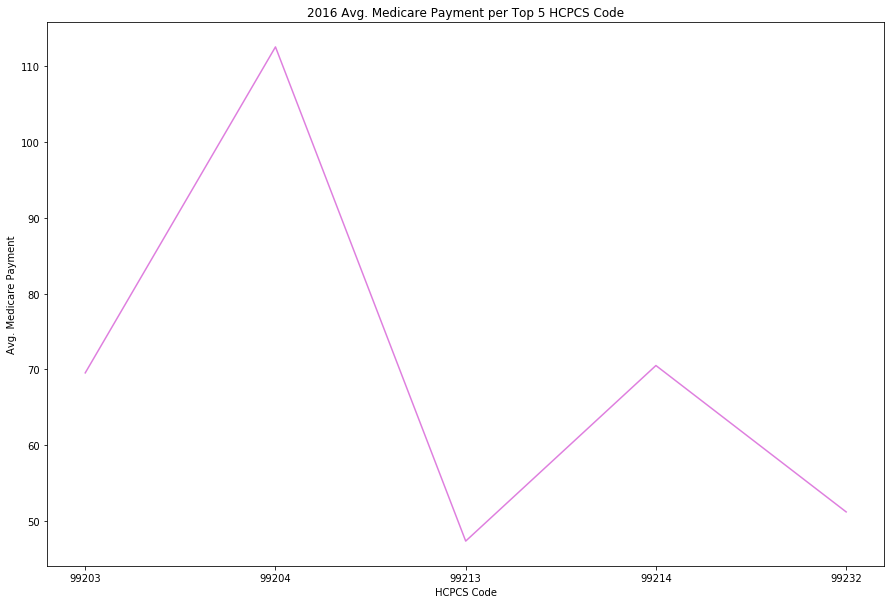

In [27]:
#plt.figure(figsize=(width, length))
#you have to set the figsize before plotting the graph

#plt.scatter(x, y, s=area, c='color', alpha=0.5)
#for the code above: x = df.column, y = df.column

# plt.title('Title_Name')
# plt.xlabel('x_lable_name')
# plt.ylabel('y_label_name')
#plt.legend(loc = "upper left")

# plt.scatter(gdp_internet_2004.Internet_Users_Pct, gdp_internet_2004.GDP_Per_Capita, c='olive', alpha=0.5) - this flipped the graph

plt.figure(figsize=(15,10))

plt.plot(code_plots.hcpcs_code, code_plots.code_medicare_payment_avg, c='m', alpha=0.5)

plt.title('2016 Avg. Medicare Payment per Top 5 HCPCS Code')
plt.xlabel('HCPCS Code')
plt.ylabel('Avg. Medicare Payment')
#plt.legend(loc="lower right")
plt.show()

**Test Plotting for Top 10 HCPCS Codes**

1. Calculate the overall avg payment for each Top 5 hcpcs code.
2. Merge dfs by year
3. Plot the avgs as one data point (each year will have its on color)


avg_list = df.loc[: , "original_column"]

df["new_column_name"] = avg_list.mean(axis=0)

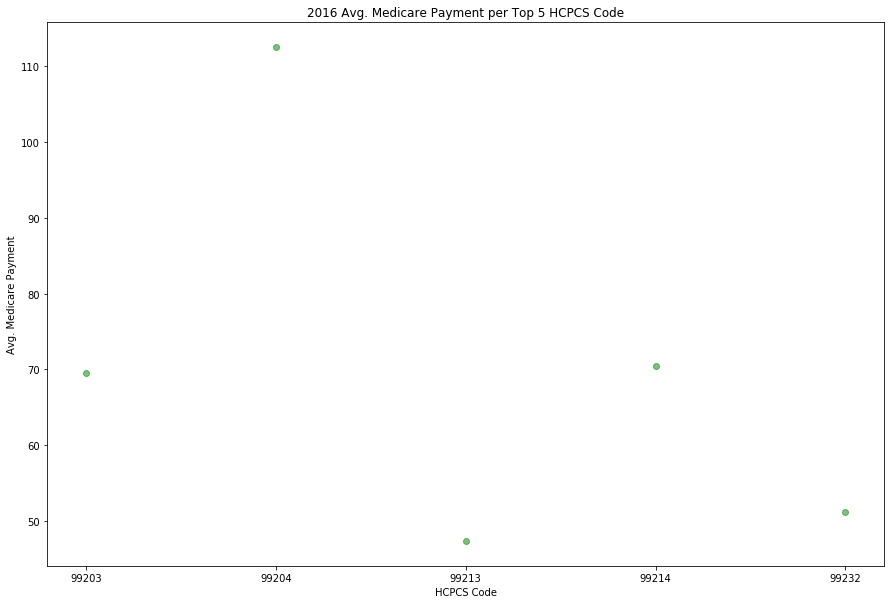

In [28]:
#scatter

plt.figure(figsize=(15,10))

plt.scatter(code_plots.hcpcs_code, code_plots.code_medicare_payment_avg, c='green', alpha=0.5)

plt.title('2016 Avg. Medicare Payment per Top 5 HCPCS Code')
plt.xlabel('HCPCS Code')
plt.ylabel('Avg. Medicare Payment')
#plt.legend(loc="lower right")
plt.show()